# Seam Carving
Inspired by
[Seam Carving|Week 2|18.S191|MIT Fall 2020|Grant Sanderson](https://www.youtube.com/watch?v=rpB6zQNsbQU)

In [1]:
from PIL import Image,ImageFilter
import cv2
import numpy as np
import matplotlib.pyplot as plt

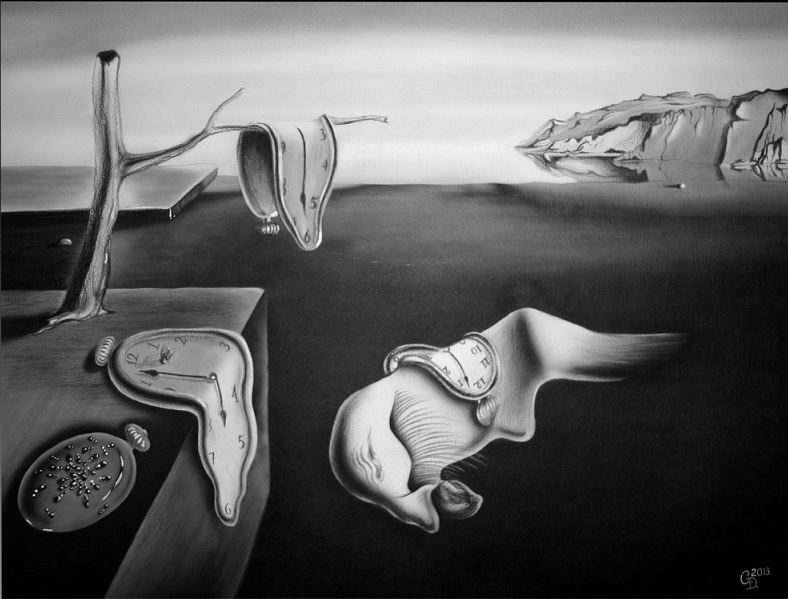

In [32]:
image=Image.open('./dali2.jpg').convert('L')
image

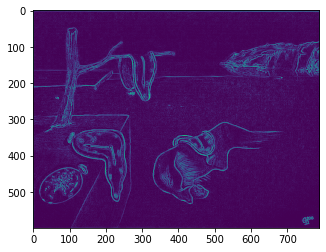

In [33]:
edgy_img=np.asarray(image.filter(ImageFilter.FIND_EDGES))
edgy_img=edgy_img/255.
plt.imshow(edgy_img)

In [34]:
new_arr=edgy_img.tolist()

In [35]:
for j in range(len(new_arr)-2,-1,-1):
    for i in range(0,len(new_arr[j])):
        if i==0:
            new_arr[j][i]+=min(
                new_arr[j+1][i],
                new_arr[j+1][i+1]
            )
        elif i==len(new_arr[j])-1:
            new_arr[j][i]+=min(
                new_arr[j+1][i-1],
                new_arr[j+1][i]
            )
        else:
            new_arr[j][i]+=min(
                new_arr[j+1][i-1],
                new_arr[j+1][i],
                new_arr[j+1][i+1]
            )

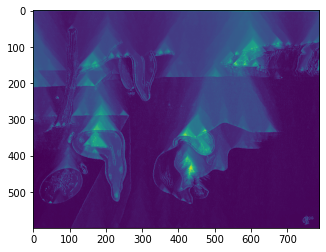

In [36]:
plt.imshow(np.array(new_arr))

In [37]:
shrunk=edgy_img.tolist()
shrink_width=0.6

def find_mindex(min_cell,i):
    
    if min_cell==0:
        minel=min(
            shrunk[i][min_cell],
            shrunk[i][min_cell+1]
        )
        if minel==shrunk[i][min_cell]:
            return min_cell
        elif minel==shrunk[i][min_cell+1]:
            return min_cell+1
    elif min_cell==len(shrunk[i])-1:
        minel=min(
            shrunk[i][min_cell],
            shrunk[i][min_cell-1]
        )
        if minel==shrunk[i][min_cell]:
            return min_cell
        elif minel==shrunk[i][min_cell-1]:
            return min_cell-1
    else:
        minel=min(
            shrunk[i][min_cell],
            shrunk[i][min_cell-1],
            shrunk[i][min_cell+1]
        )
        if minel==shrunk[i][min_cell]:
            return min_cell
        elif minel==shrunk[i][min_cell-1]:
            return min_cell-1
        elif minel==shrunk[i][min_cell+1]:
            return min_cell+1

for k in range(0,int((1-shrink_width)*len(new_arr[0]))):
    min_cell=[l for l,j in enumerate(shrunk[0]) if j==min(shrunk[0])][0]
    for i in range(0,len(shrunk)):
        min_bell=find_mindex(min_cell,i)
        shrunk[i-1].pop(min_cell)
        min_cell=min_bell
    

In [38]:
len(shrunk[0])

473

AxesImage(54,36;334.8x217.44)


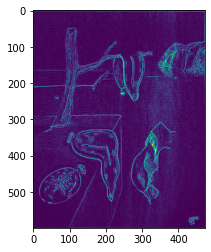

In [39]:
print(plt.imshow(np.array(shrunk)))